<a href="https://colab.research.google.com/github/kumarmayank29/Linear_classification-BCD/blob/main/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [133]:
#LOAD THE DATASET
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [134]:
type(data)


sklearn.utils.Bunch

Bunch object is like a dictionary where we have keys like attributes

In [135]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [136]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [137]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [138]:
data['data'].shape

#569 rows and 30 columns

(569, 30)

In [139]:
len(data)

6

In [140]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [141]:
#We want to know names of target
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [142]:
#Its the name of columns
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [143]:
len(data['feature_names'])


30

So we basically have 569 rows each row has 30 columns as row1- mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error','fractal dimension error', 'worst radius', 'worst texture','worst perimeter', 'worst area', 'worst smoothness','worst compactness', 'worst concavity', 'worst concave points','worst symmetry', 'worst fractal dimension'
       
Similarly row2 has same 30 features likewise we have from 0 to 568 rows each with 30 columns or features   

In [144]:
data.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv'

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['data'],data['target'],test_size=0.33)

In [146]:
X_train[0]

array([1.303e+01, 1.842e+01, 8.261e+01, 5.238e+02, 8.983e-02, 3.766e-02,
       2.562e-02, 2.923e-02, 1.467e-01, 5.863e-02, 1.839e-01, 2.342e+00,
       1.170e+00, 1.416e+01, 4.352e-03, 4.899e-03, 1.343e-02, 1.164e-02,
       2.671e-02, 1.777e-03, 1.330e+01, 2.281e+01, 8.446e+01, 5.459e+02,
       9.701e-02, 4.619e-02, 4.833e-02, 5.013e-02, 1.987e-01, 6.169e-02])

In [147]:
len(X_train[0])

30

In [148]:
X_train.shape

(381, 30)

N:Number of rows and D:Number of Features

In [149]:
N,D=X_train.shape
print(N,D)

381 30


Before Building neural Network its better to Scale the numbers because neural network hates really large numbers

In [150]:
#Scaling

In [151]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

**TENSORFLOW**


First we will be building a model of type Sequential
Sequential Consists of two objects:
1)Input:Placeholder.Used to specify size of input features i.e D in our case

2)Dense:Real Work ie Model learning happen here

This is a binary Classification problem therefore activation function used at the output layer is :Sigmoid


In [152]:
#BUILD THE MODEL

# WAY 1
#import tensorflow as tf
#import keras
#tf.keras.models.Sequential([
 #                           tf.keras.layers.Input(shape=(D,))
                          #tf.keras.layers.Dense(1,activation='sigmoid')
#])


**BUILD A MODEL**

In [153]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(D,),activation='sigmoid'))


**NOW COMPILE THE MODEL**

In [154]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)


**TRAIN THE MODEL FOR 100 EPOCHS**

**So What is an Epoch ?**
As we know neural networks learn by updating a there weights and bias untill the predicted output matches with actual output.Unless this does not happens Neural network continues to learn.
Epoch is combination of Forward and Backward Pass(Required when predicted does not match with actual output)  


In [155]:
#Model fitted and stored inside r
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 0.8850 - accuracy: 0.4409 - val_loss: 0.7928 - val_accuracy: 0.5213
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.4908 - val_loss: 0.7203 - val_accuracy: 0.5851
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7365 - accuracy: 0.5617 - val_loss: 0.6573 - val_accuracy: 0.6383
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6352 - val_loss: 0.6002 - val_accuracy: 0.6702
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6850 - val_loss: 0.5506 - val_accuracy: 0.7021
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7270 - val_loss: 0.5087 - val_accuracy: 0.7766
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7638 - val_loss: 0.4713 - val_accuracy: 0.8032
Epoch 8/100


**EVALUATE THE MODEL**

In [156]:
#Loss and accuracy of train data
print(model.evaluate(X_train,y_train))

12/12 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9816
[0.10544583946466446, 0.9816272854804993]


In [157]:
#Loss and accuracy of test data
print(model.evaluate(X_test,y_test))

6/6 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9787
[0.09352482855319977, 0.978723406791687]


**PLOT THE RESULTS**

The Results plotted show that incase of loss metric it decreses with increase in number of epochs or iterations and 

For Accuracy we see Accuracy increases as number of epochs increases

In [158]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

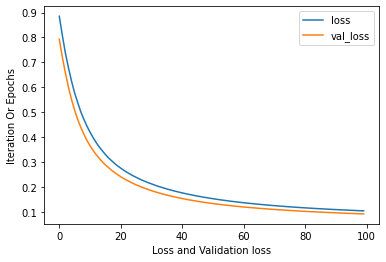

In [160]:
#We clearly observe with each epochs model learning is more enhanced as loss value decreses continuously
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel("Loss and Validation loss")
plt.ylabel("Iteration Or Epochs")
plt.legend()

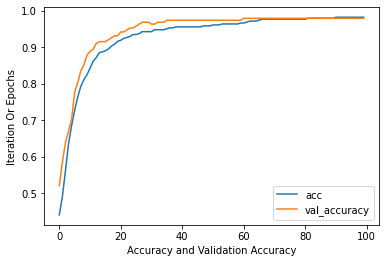

In [161]:
#Here we observe that with each and every epoch the accuracy is increasing

import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel("Accuracy and Validation Accuracy")
plt.ylabel("Iteration Or Epochs")
plt.legend()

**PREDICTION**

In [163]:
y_pred=model.predict(X_test)
print(y_pred)

[[1.31291151e-03]
 [1.56319141e-03]
 [6.48984373e-01]
 [2.80921757e-02]
 [9.44825411e-01]
 [9.93844569e-01]
 [5.35136700e-01]
 [9.09880519e-01]
 [9.98067021e-01]
 [9.29633021e-01]
 [4.79211807e-02]
 [9.86146927e-01]
 [9.57919836e-01]
 [1.27676725e-02]
 [9.95977163e-01]
 [2.81706452e-03]
 [9.95682657e-01]
 [4.29540873e-04]
 [1.00550911e-04]
 [9.84240532e-01]
 [9.84763265e-01]
 [9.80726182e-01]
 [2.57730782e-02]
 [1.28526777e-01]
 [9.95482206e-01]
 [9.52440143e-01]
 [9.98694956e-01]
 [5.85485816e-01]
 [7.72493899e-01]
 [6.65323569e-06]
 [9.80602741e-01]
 [9.97441173e-01]
 [8.90837908e-01]
 [9.12051558e-01]
 [6.31329536e-01]
 [1.96695328e-04]
 [6.15298748e-03]
 [9.69647884e-01]
 [9.92901683e-01]
 [9.24787521e-01]
 [9.84474421e-01]
 [9.98921156e-01]
 [1.86401904e-02]
 [5.18116653e-02]
 [9.22610462e-01]
 [9.96187449e-01]
 [6.74277544e-03]
 [8.12119484e-01]
 [9.71339177e-05]
 [8.73997569e-01]
 [9.88412857e-01]
 [1.63408811e-06]
 [1.65127128e-01]
 [1.05919719e-01]
 [1.63602829e-03]
 [9.980391

In [167]:
import numpy as np
y_pred=np.round(y_pred).flatten()
print(y_pred)


[0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


**CALCULATE THE MODEL ACCURACY**

In [168]:
np.mean(y_pred==y_test)

0.9787234042553191

In [169]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9787


[0.09352482855319977, 0.978723406791687]